In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.animation as ani
from scipy import stats
avocado = pd.read_csv('Data/avocado.csv')

avocado['Date'] = pd.to_datetime(avocado.Date)
avocado['year'] = pd.DatetimeIndex(avocado['Date']).year
avocado['month'] = pd.DatetimeIndex(avocado['Date']).month


totalus = pd.read_excel('Data/avo2.xlsx')
totalus['month'] = pd.DatetimeIndex(totalus['Date']).month
totalus['year'] = pd.DatetimeIndex(totalus['Date']).year
totalus['Type'] = totalus['Type'].str.upper() 
totalus['Type'] = totalus['Type'].str.strip()

organictotal = totalus[totalus.Type.eq("ORGANIC")]
conventionaltotal = totalus[totalus.Type.eq("CONVENTIONAL")]

percap = pd.read_excel('Data/percapavo.xlsx')
percapmerge = pd.merge(avocado, percap, on = 'year')

percapgroup = percapmerge.AveragePrice.groupby(percapmerge.year)
percapvolume= percapmerge.TotalVolume.groupby(percapmerge.year)
percapmerge['PricePerYear'] = percapmerge['AveragePrice']*percapmerge['PerCapConsum']
percapavg = percapmerge.PricePerYear.groupby(percapmerge.year)
sns.set_style("whitegrid")

print(totalus)

         region       Date          Type  averageprice  totalvolume  \
0    Total U.S. 2020-01-06  CONVENTIONAL          0.97  46310705.72   
1    Total U.S. 2020-01-06       ORGANIC          1.40   1661847.67   
2    Total U.S. 2020-01-12  CONVENTIONAL          0.97  46524778.83   
3    Total U.S. 2020-01-12       ORGANIC          1.41   1960946.80   
4    Total U.S. 2020-01-19  CONVENTIONAL          0.93  48534972.05   
..          ...        ...           ...           ...          ...   
599     TotalUS 2018-02-04       ORGANIC          1.53   1384683.41   
600     TotalUS 2018-01-28       ORGANIC          1.61   1336979.09   
601     TotalUS 2018-01-21       ORGANIC          1.63   1283987.65   
602     TotalUS 2018-01-14       ORGANIC          1.59   1476651.08   
603     TotalUS 2018-01-07       ORGANIC          1.51   1517332.70   

       4046Units    4225Units  4770Units  TotalBagged Units  SmlBagged Units  \
0    13036248.61  10416874.46  845596.08        22010551.97      11

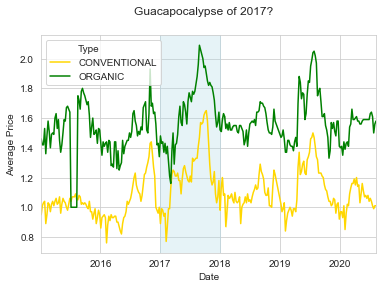

In [2]:
from datetime import datetime
from matplotlib.dates import date2num
g= sns.lineplot( x=totalus.Date, y=totalus.averageprice, hue = totalus.Type, palette = ['gold', 'green'])
#g.legend(loc='center left', bbox_to_anchor=(1, 0.84), ncol=1)
g.axvspan(pd.to_datetime('2017-01-01'),pd.to_datetime('2017-12-31'), alpha = .3, color = 'lightblue' )
x_dates = totalus['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
g.set_xlim(totalus['Date'].min(), totalus['Date'].max())
plt.suptitle("Guacapocalypse of 2017?")
plt.ylabel("Average Price")
plt.savefig("Figures/TypeScatterPlot.png", dpi = 400)


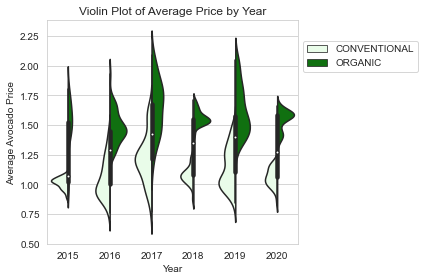

In [21]:
g=sns.violinplot(x=totalus.year, y=totalus.averageprice,  color = 'green', hue = totalus.Type, split = True)
plt.xlabel("Year")
plt.ylabel("Average Avocado Price")
plt.title("Violin Plot of Average Price by Year")
g.legend(loc='center left', bbox_to_anchor=(1, 0.84), ncol=1)
plt.tight_layout()
plt.savefig("Figures/violinAveragePriceYear.png", dpi = 400)


In [4]:
x = np.array(avocado.AveragePrice). reshape((-1,1))
y = np.array(avocado.TotalVolume)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print("")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     588.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.29e-76
Time:                        14:51:22   Log-Likelihood:                -5934.6
No. Observations:                 338   AIC:                         1.187e+04
Df Residuals:                     336   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.78e+07   2.55e+06     30.478      0.0

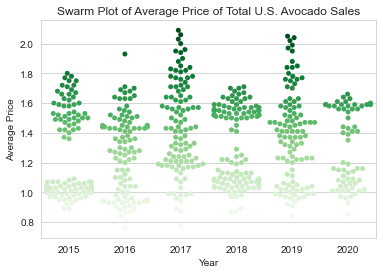

In [85]:
sns.swarmplot(x=totalus.year, y=totalus.averageprice, hue = totalus.averageprice, palette = 'Greens')
plt.legend([],[], frameon=False)
plt.xlabel ("Year")
plt.ylabel("Average Price")
plt.title("Swarm Plot of Average Price of Total U.S. Avocado Sales")
plt.savefig("Figures/swarmplotprice.png", dpi = 400)

This is regression with Ho: X does not help to predict Y/The slope is 0
The equation is averageprice = 1.374-0.0 totalvolume
The R-Squared is 0.1464 and the p-value is 0.0
Conclusion: Reject Ho: X does help predict Y


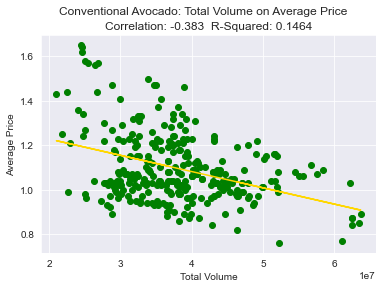

In [11]:
xvar='totalvolume'
yvar='averageprice'
x=conventionaltotal[xvar]
y=conventionaltotal[yvar]
slope, intercept, r_value, p_val, std_err = stats.linregress(y=y,x=x)

if np.sign(slope) < 1:
    slsign = ""
else:
    slsign = "+"

regeq = f"{yvar} = {round(intercept,3)}{slsign}{round(slope,3)} {xvar}"

print(f"The equation is {regeq}")

print(f"The R-Squared is {round(r_value**2,4)} and the p-value is {round(p_val,4)}")

alpha=.05
if p_val < alpha:
    print("Conclusion: Reject Ho: X does help predict Y")
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that X doesn't help to predict Y")

plt.scatter(x,y,color='green')
xyCorr = round(x.corr(y),3)
plt.title(f"Correlation: {xyCorr}  R-Squared: {round(r_value**2,4)}")
plt.suptitle("Conventional Avocado: Total Volume on Average Price")
predict_y = intercept + slope * x
plt.plot(x,predict_y,'r-', color = 'gold')
plt.xlabel("Total Volume")
plt.ylabel("Average Price")
plt.savefig('Figures/RegConventional.png', bbox_inches='tight', dpi = 400)
plt.show()




This is regression with Ho: X does not help to predict Y/The slope is 0
The equation is averageprice = 1.565-0.0 totalvolume
The R-Squared is 0.0001 and the p-value is 0.8891
Conclusion: Fail to Reject Ho: We can't reject that X doesn't help to predict Y


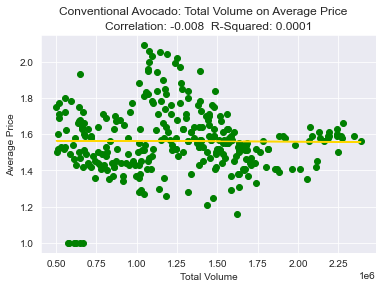

In [10]:
xvar='totalvolume'
yvar='averageprice'
x=organictotal[xvar]
y=organictotal[yvar]
slope, intercept, r_value, p_val, std_err = stats.linregress(y=y,x=x)
print("This is regression with Ho: X does not help to predict Y/The slope is 0")

if np.sign(slope) < 1:
    slsign = ""
else:
    slsign = "+"

regeq = f"{yvar} = {round(intercept,3)}{slsign}{round(slope,3)} {xvar}"

print(f"The equation is {regeq}")

print(f"The R-Squared is {round(r_value**2,4)} and the p-value is {round(p_val,4)}")

alpha=.05
if p_val < alpha:
    print("Conclusion: Reject Ho: X does help predict Y")
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that X doesn't help to predict Y")

plt.scatter(x,y,color='green')
xyCorr = round(x.corr(y),3)
plt.title(f"Correlation: {xyCorr}  R-Squared: {round(r_value**2,4)}")
plt.suptitle("Conventional Avocado: Total Volume on Average Price")
predict_y = intercept + slope * x
plt.plot(x,predict_y,'r-', color = 'gold')
plt.xlabel("Total Volume")
plt.ylabel("Average Price")
plt.savefig('Figures/Regorganic.png', bbox_inches='tight', dpi = 400)
plt.show()



<ipython-input-8-054c2a531200>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conventionaltotal['PLU4046'] = conventionaltotal['4046Units']
<ipython-input-8-054c2a531200>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conventionaltotal['PLU4225'] = conventionaltotal['4225Units']
<ipython-input-8-054c2a531200>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

                            OLS Regression Results                            
Dep. Variable:           averageprice   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     72.89
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.21e-35
Time:                        14:54:53   Log-Likelihood:                 215.62
No. Observations:                 302   AIC:                            -423.2
Df Residuals:                     298   BIC:                            -408.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5818      0.038     41.264      0.0

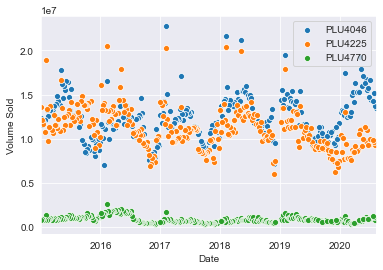

In [8]:
from statsmodels.formula.api import ols

conventionaltotal['PLU4046'] = conventionaltotal['4046Units']
conventionaltotal['PLU4225'] = conventionaltotal['4225Units']
conventionaltotal['PLU4770'] = conventionaltotal['4770Units']




model = ols("averageprice ~ PLU4046 + PLU4225 + PLU4770",conventionaltotal).fit()
print(model.summary())

g=sns.scatterplot(x=conventionaltotal.Date, y=conventionaltotal.PLU4046, label = "PLU4046")
sns.scatterplot(x=conventionaltotal.Date, y=conventionaltotal.PLU4225, label = "PLU4225")
sns.scatterplot(x=conventionaltotal.Date, y=conventionaltotal.PLU4770, label = "PLU4770")
x_dates = conventionaltotal['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
g.set_xlim(conventionaltotal['Date'].min(), conventionaltotal['Date'].max())
plt.ylabel("Volume Sold")
plt.xlabel("Date")
plt.savefig("PLUVolume.png", dpi = 400)




This is regression with Ho: X does not help to predict Y/The slope is 0
The equation is averageprice = 1.565-0.0 totalvolume
The R-Squared is 0.0001 and the p-value is 0.8891
Conclusion: Fail to Reject Ho: We can't reject that X doesn't help to predict Y


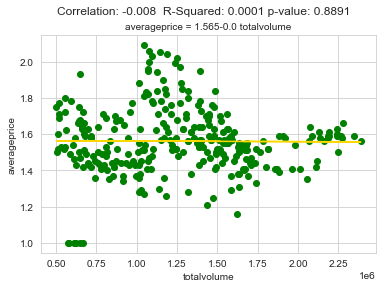

In [7]:
xvar='totalvolume'
yvar='averageprice'
x=organictotal[xvar]
y=organictotal[yvar]
slope, intercept, r_value, p_val, std_err = stats.linregress(y=y,x=x)
print("This is regression with Ho: X does not help to predict Y/The slope is 0")

if np.sign(slope) < 1:
    slsign = ""
else:
    slsign = "+"

regeq = f"{yvar} = {round(intercept,3)}{slsign}{round(slope,3)} {xvar}"

print(f"The equation is {regeq}")

print(f"The R-Squared is {round(r_value**2,4)} and the p-value is {round(p_val,4)}")

alpha=.05
if p_val < alpha:
    print("Conclusion: Reject Ho: X does help predict Y")
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that X doesn't help to predict Y")

plt.scatter(x,y,color='green')
xyCorr = round(x.corr(y),3)
plt.suptitle(f"Correlation: {xyCorr}  R-Squared: {round(r_value**2,4)} p-value: {round(p_val,4)}")
plt.title(regeq, size=10)
predict_y = intercept + slope * x
plt.plot(x,predict_y,'r-', color = 'gold')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.savefig('Figures/regOrganic.png', bbox_inches='tight', dpi = 400)
plt.show()



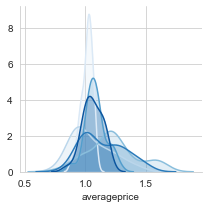

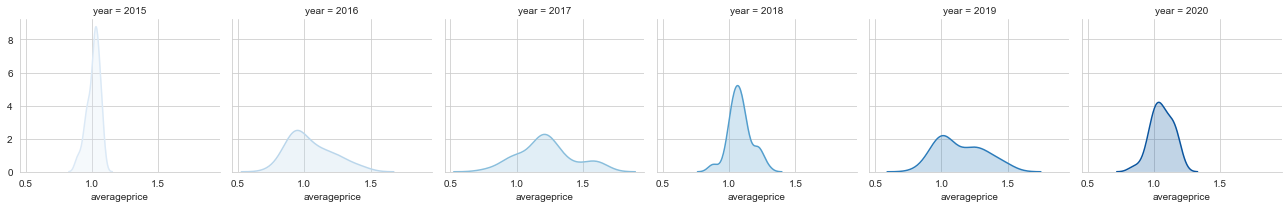

In [21]:
avomean = totalus.averageprice.groupby(avocado.year)
avom = avomean.mean()

avomerge = pd.merge(avom, avocado, on = 'year')


g = sns.FacetGrid(totalus, hue="year", palette = "Blues")
g = g.map(sns.kdeplot, "averageprice", shade=True)
plt.savefig("Figures/AveragePriceOverlap.png", dpi = 400)

p = sns.FacetGrid(totalus, hue="year", palette = "Blues", col = 'year')
p = p.map(sns.kdeplot, "averageprice", shade=True)
plt.savefig("Figures/AveragePriceFacet.png", dpi = 400)


In [3]:
import folium
df = pd.read_excel("Data/mapavo.xls")
df['year'] = pd.DatetimeIndex(df['Date']).year
df = df.dropna()
df2015 = df[df.year.eq(2015)]

dfmean = df2015.AveragePrice.groupby(df2015.region)
dfom = dfmean.mean()
dfmerge = pd.merge(dfom, df2015, on = 'region')
df2015 = dfmerge[['region','AveragePrice_x', 'lon', 'lat']]
df2015 = df2015[~df2015.region.duplicated(keep='first')]

df2015['marker_color'] = pd.cut(df2015['AveragePrice_x'], bins=3, 
                              labels=['lightsalmon', 'indianred', 'maroon'])

latitude = 37.0902
longitude = -95.7129
m = folium.Map(location=[latitude, longitude], zoom_start=3.5)
for i in range(0,len(df2015)):
    folium.Circle(
      location=[df2015.iloc[i]['lon'], df2015.iloc[i]['lat']],
      popup=(df2015.iloc[i]['region'], df2015.iloc[i]['AveragePrice_x']),
      radius=df2015.iloc[i]['AveragePrice_x']*60000,
      color=df2015.iloc[i]['marker_color'],
      fill=False,
      fill_color = df2015.iloc[i]['marker_color'],
      fill_opacity = .5
   ).add_to(m)
m.save('Figures/AveragePriceBubbleMap.html')
display(m)

      region       Date          type  AveragePrice  TotalVolume     PLU4046  \
0    TotalUS 2015-12-27  conventional          0.95  27297983.67  9626901.09   
1    TotalUS 2015-12-20  conventional          0.98  25083647.17  8710021.76   
2    TotalUS 2015-12-13  conventional          0.93  28041335.38  9855053.66   
3    TotalUS 2015-12-06  conventional          0.89  28800396.57  9405464.36   
4    TotalUS 2015-11-29  conventional          0.99  22617999.38  8094803.56   
..       ...        ...           ...           ...          ...         ...   
333  TotalUS 2018-02-04       organic          1.53   1384683.41   117922.52   
334  TotalUS 2018-01-28       organic          1.61   1336979.09   118616.17   
335  TotalUS 2018-01-21       organic          1.63   1283987.65   108705.28   
336  TotalUS 2018-01-14       organic          1.59   1476651.08   145680.62   
337  TotalUS 2018-01-07       organic          1.51   1517332.70   129541.43   

         PLU4225     PLU4770   TotalBag

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


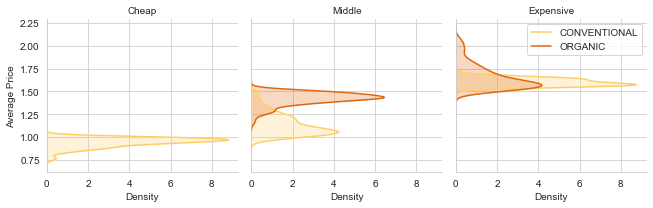

In [15]:

bins = [.5, 1, 1.5, 4]
labels = ['Cheap', 'Middle', 'Expensive']
totalus['binned'] = pd.cut(totalus['averageprice'], bins=bins, labels=labels)
print (avocado)
g = sns.FacetGrid(totalus, hue="Type", palette = "YlOrBr", col='binned')
g = g.map(sns.kdeplot, "averageprice", vertical = True, shade = True)
plt.legend()
g.axes[0,0].set_xlabel('Density')
g.axes[0,1].set_xlabel('Density')
g.axes[0,2].set_xlabel('Density')
g.axes[0,0].set_ylabel('Average Price')
g.set_titles(col_template = '{col_name}')
plt.savefig("Figures/FacetBinnedAveragePrice.png", dpi = 400)


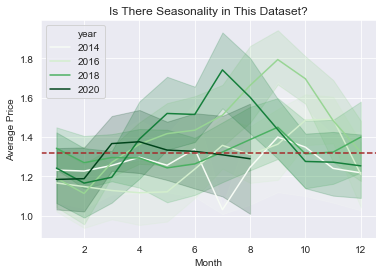

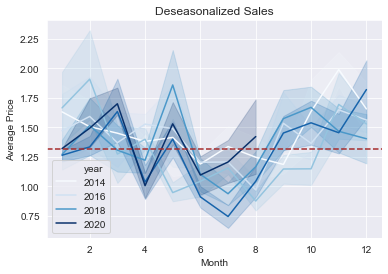

In [3]:
sns.set_style("darkgrid")
x= avocado.AveragePrice.mean()


g=sns.lineplot(x=totalus.month, y=totalus.averageprice, hue = totalus.year, palette = 'Greens')
plt.title('Is There Seasonality in This Dataset?')
plt.axhline(x, linestyle ='--', color = 'brown', label = 'Overall mean')
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.savefig("Figures/SeasonalSmooth.png", dpi = 400)
plt.show()

avomean = totalus.averageprice.groupby(totalus.month)
avom = avomean.mean()
avomerge2 = pd.merge(avom, totalus, on = 'month')
avomerge2['SI'] = avomerge2['averageprice_y']/1.319023668639053
avomerge2['dsales'] = totalus['averageprice']/avomerge2['SI']

g=sns.lineplot(x=avomerge2.month, y=avomerge2.dsales, hue = avomerge2.year, palette = 'Blues')
plt.axhline(x, linestyle ='--', color = 'brown', label = 'Overall mean')
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Deseasonalized Sales")
plt.savefig("Figures/deSeasonalSmooth.png", dpi = 400)
plt.show()

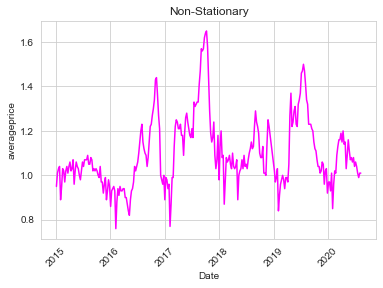

Dickey-Fuller p-value: 0.003052
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


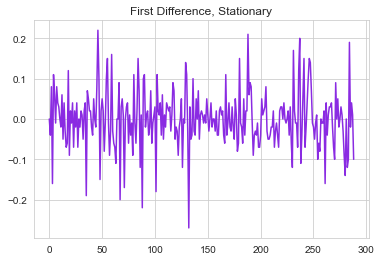

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

                             ARIMA Model Results                              
Dep. Variable:         D.averageprice   No. Observations:                  289
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 357.327
Method:                           css   S.D. of innovations              0.070
Date:                Wed, 18 Nov 2020   AIC                           -710.654
Time:                        15:49:38   BIC                           -703.321
Sample:                             1   HQIC                          -707.716
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.004     -0.067      0.947      -0.008       0.008
Forecast: -0.000277


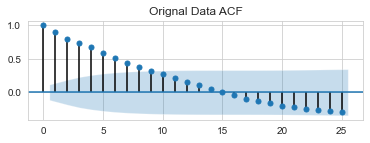

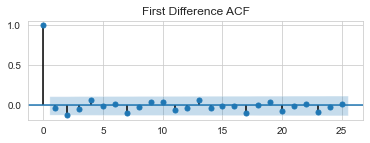

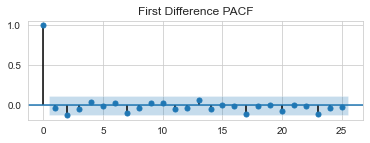

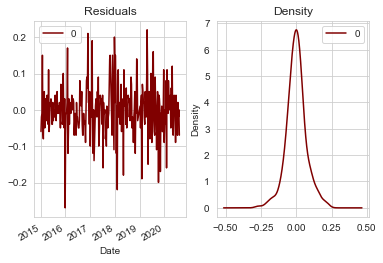

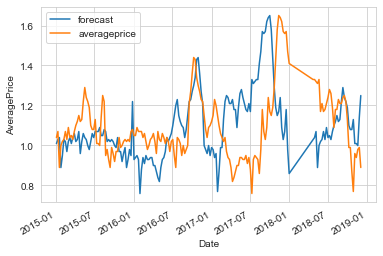

In [3]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
sns.set_style("whitegrid")



totalus = pd.read_excel('Data/avo2.xlsx')

totalus = pd.read_excel('Data/avo2.xlsx')
totalus['month'] = pd.DatetimeIndex(totalus['Date']).month
totalus['year'] = pd.DatetimeIndex(totalus['Date']).year
totalus['Type'] = totalus['Type'].str.upper() 
totalus['Type'] = totalus['Type'].str.strip()

totalus = totalus[totalus.Type.eq("CONVENTIONAL")]
totalus = totalus.set_index('Date')
totalus = totalus[~totalus.index.duplicated(keep='first')]





sns.lineplot(x=totalus.index, y=totalus.averageprice, color = 'fuchsia')
plt.title("Non-Stationary")
plt.xticks(rotation=45)
plt.savefig("Figures/AveragePriceLineplt.png" , dpi=400)
plt.show()



X = totalus.averageprice
result = adfuller(X)
print('Dickey-Fuller p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return Series(diff)

X=totalus.averageprice
diff = difference(X)
pyplot.plot(diff, color = 'blueviolet')
plt.title("First Difference, Stationary")
plt.savefig("Figures/AvgPFirstDiff.png", dpi = 400)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(totalus.averageprice, ax=pyplot.gca())
plt.title("Orignal Data ACF")
plt.savefig("Figures/AvgPACF.png", dpi = 400)


model = ARIMA(totalus.averageprice, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
start_index = len(diff)
end_index = len(diff)
forecast = model_fit.predict(start=start_index, end=end_index)
print('Forecast: %f' % forecast)


pyplot.figure()
pyplot.subplot(211)
plot_acf(diff, ax=pyplot.gca())
plt.title("First Difference ACF")
plt.savefig("Figures/AvgPFirstDiffACF.png", dpi = 400)
plt.show()

pyplot.subplot(212)
plot_pacf(diff, ax=pyplot.gca())
plt.title("First Difference PACF")
plt.savefig("Figures/AvgPFirstDiffPACF.png", dpi = 400)
pyplot.show()

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], color = 'maroon')
residuals.plot(kind='kde', title='Density', ax=ax[1], color = 'maroon')
plt.savefig("Figures/AvgPResidual.png", dpi = 400)
plt.show()

model_fit.plot_predict(dynamic=False, start=100)
plt.ylabel("AveragePrice")
plt.savefig("Figures/AvgPpredict.png", dpi = 400)
plt.show()

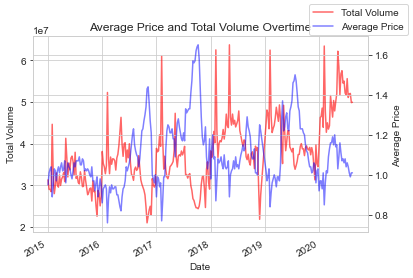

In [37]:
ax = conventionaltotal.plot(x='Date', y="totalvolume", legend=False, color = 'red', alpha = .6, label = "Total Volume")
ax2 = ax.twinx()
conventionaltotal.plot(x="Date", y="averageprice", ax=ax2, legend=False, color="blue", alpha = .5, label = "Average Price")
ax.figure.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Total Volume')
ax2.set_ylabel('Average Price ')
plt.title("Average Price and Total Volume Overtime")
plt.savefig("Figures/TwoaxisPriceVolume.png", dpi = 400)
plt.show()


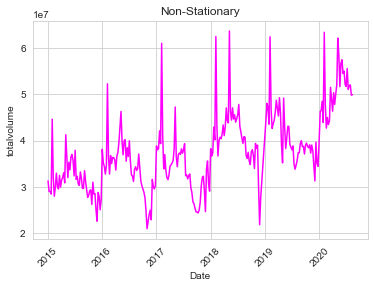

Dickey-Fuller p-value: 0.243424
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


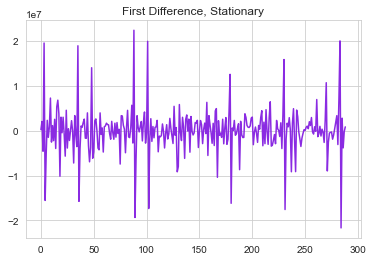

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

                             ARIMA Model Results                              
Dep. Variable:          D.totalvolume   No. Observations:                  289
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -4835.720
Method:                       css-mle   S.D. of innovations        4469413.340
Date:                Wed, 18 Nov 2020   AIC                           9679.441
Time:                        16:19:58   BIC                           9694.107
Sample:                             1   HQIC                          9685.317
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.571e+04   8.83e+04     -0.291      0.771   -1.99e+05    1.47e+05
ma.L1.D.totalvolume    -0.5396      0.062     -8.660      0.000      -0.662      -0.418
ma.L2.D.totalvol

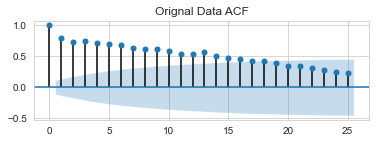

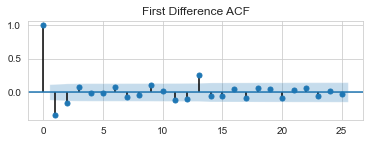

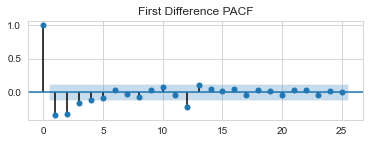

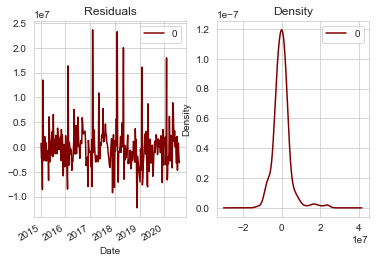

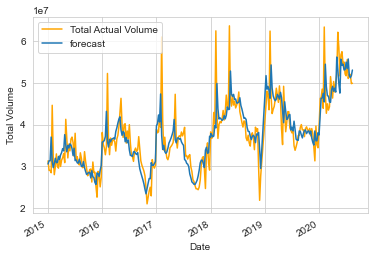

In [6]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
sns.set_style("whitegrid")



totalus = pd.read_excel('Data/avo2.xlsx')

totalus = pd.read_excel('Data/avo2.xlsx')
totalus['month'] = pd.DatetimeIndex(totalus['Date']).month
totalus['year'] = pd.DatetimeIndex(totalus['Date']).year
totalus['Type'] = totalus['Type'].str.upper() 
totalus['Type'] = totalus['Type'].str.strip()

totalus = totalus[totalus.Type.eq("CONVENTIONAL")]
totalus = totalus.set_index('Date')
totalus = totalus[~totalus.index.duplicated(keep='first')]





g=sns.lineplot(x=totalus.index, y=totalus.totalvolume, color = 'fuchsia')
plt.title("Non-Stationary")
plt.xticks(rotation=45)
plt.savefig("Figures/VolLineplt.png" , dpi=400)
plt.show()



X = totalus.totalvolume
result = adfuller(X)
print('Dickey-Fuller p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return Series(diff)

X=totalus.totalvolume
diff = difference(X)
pyplot.plot(diff, color = 'blueviolet')
plt.title("First Difference, Stationary")
plt.savefig("Figures/VolDiff.png", dpi = 400)
pyplot.show()

pyplot.figure()
pyplot.subplot(211)
plot_acf(totalus.totalvolume, ax=pyplot.gca())
plt.title("Orignal Data ACF")
plt.savefig("Figures/VolPACF.png", dpi = 400)


model = ARIMA(totalus.totalvolume, order=(0,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
start_index = len(diff)
end_index = len(diff)
forecast = model_fit.predict(start=start_index, end=end_index)
print('Forecast: %f' % forecast)


pyplot.figure()
pyplot.subplot(211)
plot_acf(diff, ax=pyplot.gca())
plt.title("First Difference ACF")
plt.savefig("Figures/VolFirstDiffACF.png", dpi = 400)
plt.show()

pyplot.subplot(212)
plot_pacf(diff, ax=pyplot.gca())
plt.title("First Difference PACF")
plt.savefig("Figures/VolFirstDiffPACF.png", dpi = 400)
pyplot.show()

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], color = 'maroon')
residuals.plot(kind='kde', title='Density', ax=ax[1], color = 'maroon')
plt.savefig("Figures/VolResidual.png", dpi = 400)
plt.show()


ax = sns.lineplot(x=totalus.index, y=totalus.totalvolume, label = 'Total Actual Volume', color = 'orange')
model_fit.plot_predict( dynamic=False, plot_insample=False, ax=ax)
plt.ylabel("Total Volume")
plt.savefig("Figures/Volpredict.png", dpi = 400)
plt.show()

Conclusion: Fail to Reject Ho: We can't reject that the means are the same
Multiple Comparison of Means - Tukey HSD, FWER=0.20 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  East   West  -0.0693 0.1617 -0.1328 -0.0059   True
----------------------------------------------------


ValueError: The lengths of the data (2) and the error 1 do not match

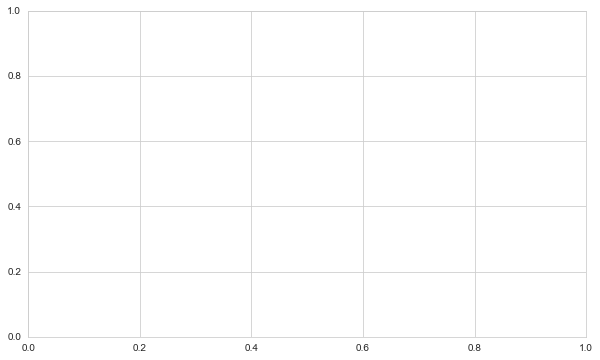

In [21]:
#ANOVA
df2015 


bins = [-180, -110, -10]
labels = ['West', 'East']
df2015['binned'] = pd.cut(df2015['lat'], bins=bins, labels=labels)
east= df2015[df2015.binned.eq("East")]
west= df2015[df2015.binned.eq("West")]


from statsmodels.stats.multicomp import pairwise_tukeyhsd



alpha = .05
f, p_val = stats.f_oneway(east.AveragePrice_x, west.AveragePrice_x)
#print(f, p_val)

if p_val < alpha:
    print("Conclusion: Reject Ho: At least one group mean is different")
    ANOVAtype = "ANOVA: At least one group mean different"
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    ANOVAtype = "ANOVA: Group Means are the same"



# Data (endogenous/response variable)
tukey = pairwise_tukeyhsd(endog=df2015.AveragePrice_x,
                          groups=df2015.binned, alpha=0.2)

print(tukey.summary() )

tukey.plot_simultaneous()
plt.vlines(x=df2015.AveragePrice_x.mean(),ymin=-1,ymax=5, color="red")
plt.show()

This is a test of equal means
Ho: The means of all groups are equal
Ha: At least one group mean is different
The F test statistic is 7.799 and the p-value is 0.0
Conclusion: Reject Ho: At least one group mean is different

Region by TotalSales columns
      averageprice
year              
2015      1.257404
2016      1.263558
2017      1.436604
2018      1.319590
2019      1.381923
2020      1.301094


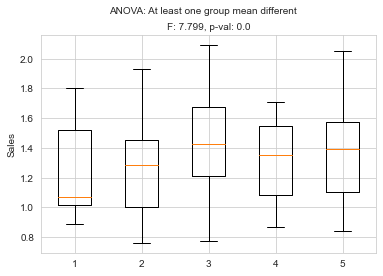

Multiple Comparison of Means - Tukey HSD, FWER=0.20 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2015   2016   0.0062    0.9 -0.0829  0.0952  False
  2015   2017   0.1792  0.001  0.0906  0.2678   True
  2015   2018   0.0622 0.5503 -0.0235  0.1479  False
  2015   2019   0.1245  0.018  0.0355  0.2136   True
  2015   2020   0.0437    0.9 -0.0583  0.1457  False
  2016   2017    0.173  0.001  0.0844  0.2617   True
  2016   2018    0.056 0.6449 -0.0297  0.1417  False
  2016   2019   0.1184 0.0294  0.0293  0.2074   True
  2016   2020   0.0375    0.9 -0.0645  0.1396  False
  2017   2018   -0.117 0.0217 -0.2023 -0.0317   True
  2017   2019  -0.0547 0.6935 -0.1433   0.034  False
  2017   2020  -0.1355 0.0286 -0.2372 -0.0338   True
  2018   2019   0.0623  0.548 -0.0234   0.148  False
  2018   2020  -0.0185    0.9 -0.1176  0.0806  False
  2019   2020  -0.0808 0.4595 -0.1829  0.0212  False
----------------------------------------------

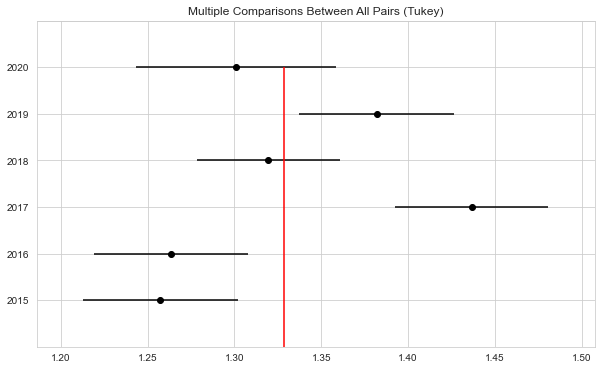

In [24]:
avo2015 = totalus[totalus['year']==2015]
avo2016 = totalus[totalus['year']==2016]
avo2017 = totalus[totalus['year']==2017]
avo2018 = totalus[totalus['year']==2018]
avo2019 = totalus[totalus['year']==2019]





alpha = .2
f, p_val = stats.f_oneway(avo2015.averageprice, avo2016.averageprice, avo2017.averageprice, avo2018.averageprice, avo2019.averageprice)

print("This is a test of equal means")
print("Ho: The means of all groups are equal")
print("Ha: At least one group mean is different")

print(f"The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}")

if p_val < alpha:
    print("Conclusion: Reject Ho: At least one group mean is different")
    ANOVAtype = "ANOVA: At least one group mean different"
else:
    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
    ANOVAtype = "ANOVA: Group Means are the same"

print()
print("Region by TotalSales columns")
print(totalus.pivot_table(['averageprice'], index=['year']))

# Box plot of means for Regions
y=[avo2015.averageprice, avo2016.averageprice, avo2017.averageprice, avo2018.averageprice, avo2019.averageprice]
plt.boxplot(y)
plt.title(f'F: {round(f,3)}, p-val: {round(p_val,4)}',size=10)
plt.suptitle(ANOVAtype,size=10)
#plt.xticks(range(1,5), [f"North: {round(North['TotalSales'].mean(),2)}",
                        #f"South: {round(South['TotalSales'].mean(),2)}", 
                        #f"East: {round(East['TotalSales'].mean(),2)}",
                        #f"West: {round(West['TotalSales'].mean(),2)}"])
plt.ylabel('Sales')
plt.savefig('Figures/YearANOVA.png', bbox_inches='tight', dpi = 400)
plt.show()


# Tukey pairwise comparison

from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Data (endogenous/response variable)
tukey = pairwise_tukeyhsd(endog=totalus['averageprice'],
                          groups=totalus['year'], alpha=0.2)

print(tukey.summary() )



#Plot group confidence intervals
tukey.plot_simultaneous()
plt.vlines(x=totalus['averageprice'].mean(),ymin=-1,ymax=5, color="red")
plt.savefig("YearTukeyANOVA.png", bbox_inches='tight', dpi = 400)
plt.show()






In [5]:


totalus['PLU4046'] = totalus['4046Units']
totalus['PLU4225'] = totalus['4225Units']
totalus['PLU4770'] = totalus['4770Units']


# Pivot table using TaxStatus row & TotalSales & TotalOrders columns
# Defult aggregation is mean
print("Tax Status by TotalSales and TotalOrders columns")
print(totalus.pivot_table(['averageprice','totalvolume', 'PLU4046','PLU4225','PLU4770'], index=['Type']))

print("")
print("")
print("")

#Aggregate: Sum, Tax Status & Region by TotalSales and TotalOrders columns
print(totalus.pivot_table(['averageprice','totalvolume'], aggfunc='sum', 
                         index=['Type', 'year']))

print("")
print("")
print("")
print(totalus.pivot_table(['averageprice','totalvolume'], aggfunc='mean', 
                         index=['Type', 'month']))

print("")
print("")
print(totalus.pivot_table(['averageprice','totalvolume'], aggfunc='std', 
                         index=['Type', 'month']))
print("")
print("")
print("")
print(totalus.pivot_table(['averageprice','totalvolume'], aggfunc='sum', 
                         index=['Type', 'month']))



Tax Status by TotalSales and TotalOrders columns
                   PLU4046       PLU4225        PLU4770  averageprice  \
Type                                                                    
CONVENTIONAL  1.251631e+07  1.117968e+07  867632.900232      1.096192   
ORGANIC       1.433086e+05  2.795709e+05    4684.335728      1.560894   

               totalvolume  
Type                        
CONVENTIONAL  3.795737e+07  
ORGANIC       1.264534e+06  



                   averageprice   totalvolume
Type         year                            
CONVENTIONAL 2015         52.65  1.623686e+09
             2016         54.43  1.770259e+09
             2017         64.75  1.801770e+09
             2018         65.82  2.513085e+09
             2019         59.47  2.124402e+09
             2020         33.93  1.629922e+09
ORGANIC      2015         78.12  3.356931e+07
             2016         76.98  4.889975e+07
             2017         87.53  6.292368e+07
             2018         95.17  

In [3]:


PT= CustDF.groupby('TaxStatus')
print(PT.agg('mean'))

Tax Status by all numeric columns
         4046Units     4225Units      4770Units  LrgBagged Units  \
year                                                               
2015  6.268345e+06  6.357582e+06  515475.103365     4.813708e+05   
2016  5.662949e+06  6.015746e+06  581029.042788     1.209369e+06   
2017  6.003558e+06  5.443721e+06  317038.286226     1.420327e+06   
2018  6.898653e+06  6.122866e+06  371168.768934     2.086028e+06   
2019  5.985725e+06  5.206323e+06  438784.647788     3.312220e+06   
2020  7.528477e+06  4.818540e+06  388767.539687     4.765600e+06   

      SmlBagged Units  TotalBagged Units  X-LrgBagged Units  averageprice  \
year                                                                        
2015     2.292588e+06       2.793745e+06       19785.992308      1.257404   
2016     3.950463e+06       5.232191e+06       72358.423365      1.263558   
2017     4.320954e+06       5.827024e+06       85743.771038      1.436604   
2018     5.766075e+06       7.972055